<a href="https://colab.research.google.com/github/zwarshavsky/AB-Demo/blob/master/module2-intermediate-linear-algebra/Zhenya_Warshavsky_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [13]:
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean = sum(sales) / len(sales)


def var(n):
    l = []
    m = sum(n) / len(n)
    for i in n:
        l.append((i - m) ** 2)
    return sum(l)/len(l)

def stdev(n):
    l = []
    m = sum(n) / len(n)
    for i in n:
        l.append((i - m) ** 2)
    return (sum(l) / len(l)) ** .5

print("The mean is:",mean,"\nThe variance is:",var(sales),"\nthe standard deviation is:",stdev(sales))



The mean is: 3052.714285714286 
The variance is: 183761.06122448976 
the standard deviation is: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [25]:
#using numpy for covariance output

customers = [127, 80, 105, 92, 120, 115, 93]

np.cov(sales,customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [22]:
#creating dataframe
data = {"sales": [3505, 2400, 3027, 2798, 3700, 3250, 2689], "entered": [127, 80, 105, 92, 120, 115, 93]}

df = pd.DataFrame(data)
df

,sales,entered
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


###Covariance: need to explain to oneself

In [35]:
#question: what only two values per intersection? what does this interaction actually saying?

#calculating covariance via pandas

cov = df.cov()
cov

,sales,entered
sales,214387.904762,7604.357143
entered,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [79]:
import statistics

#not getting the correct output from running this manually and also what is wrong with my standard deviation



def stdev(n):
    l = []
    m = sum(n) / (len(n) - 1)
    for i in n:
        l.append((i - m) ** 2)
    return (sum(l) / len(l)) ** .5

print("custy stdev:",stdev(customers),"sales stdev:",stdev(sales))

prod1 = stdev(customers) * stdev(sales)

prod2 = statistics.stdev(customers) * statistics.stdev(sales)

display(cov.div(prod1),cov.div(prod2))


custy stdev: 23.518989288293344 sales stdev: 665.2999055205962


,sales,entered
sales,13.701375,0.485989
entered,0.485989,0.018595


,sales,entered
sales,27.144959,0.962834
entered,0.962834,0.036839


In [73]:
# 214387.904762 / prod

prod

7897.89030930846

In [37]:
#The correct correlation coefficients 

cov.corr()

,sales,entered
sales,1.0,1.0
entered,1.0,1.0


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
dft = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

In [49]:
dft = dft.fillna(0) 
dft.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1


In [51]:
dft2 = dft.drop(['name', 'sex',"age","cabin","embarked","boat","home.dest","has_cabin_number"],axis=1)
dft2.head()

,Unnamed: 0,pclass,survived,sibsp,parch,ticket,fare,body
0,1,1.0,1.0,0.0,0.0,24160,211.3375,0.0
1,2,1.0,1.0,1.0,2.0,113781,151.5500,0.0
2,3,1.0,0.0,1.0,2.0,113781,151.5500,0.0
3,4,1.0,0.0,1.0,2.0,113781,151.5500,135.0
4,5,1.0,0.0,1.0,2.0,113781,151.5500,0.0


In [52]:
dft2.cov()

,Unnamed: 0,pclass,survived,sibsp,parch,fare,body
Unnamed: 0,143117.500000,282.992361,-54.116883,25.559587,0.979374,-9427.515484,-613.393430
pclass,282.992361,0.705453,-0.126482,0.053924,0.013952,-24.150423,-2.164033
survived,-54.116883,-0.126482,0.236181,-0.013932,0.034861,6.156049,-5.673581
sibsp,25.559587,0.053924,-0.013932,1.084413,0.336722,8.653922,-3.048352
parch,0.979374,0.013952,0.034861,0.336722,0.748735,9.932434,-1.153653
fare,-9427.515484,-24.150423,6.156049,8.653922,9.932434,2676.557808,-40.679167
body,-613.393430,-2.164033,-5.673581,-3.048352,-1.153653,-40.679167,3044.601879


In [55]:
dft2.corr()

,Unnamed: 0,pclass,survived,sibsp,parch,fare,body
Unnamed: 0,1.000000,0.890624,-0.294350,0.064880,0.002992,-0.481684,-0.029385
pclass,0.890624,1.000000,-0.309865,0.061652,0.019197,-0.555779,-0.046694
survived,-0.294350,-0.309865,1.000000,-0.027529,0.082901,0.244845,-0.211578
sibsp,0.064880,0.061652,-0.027529,1.000000,0.373689,0.160630,-0.053052
parch,0.002992,0.019197,0.082901,0.373689,1.000000,0.221872,-0.024163
fare,-0.481684,-0.555779,0.244845,0.160630,0.221872,1.000000,-0.014250
body,-0.029385,-0.046694,-0.211578,-0.053052,-0.024163,-0.014250,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

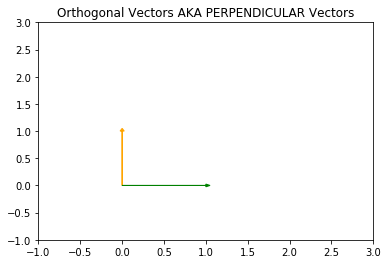

In [58]:
vector_1 = [0, 1]
vector_2 = [1, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors AKA PERPENDICULAR Vectors")
plt.show()

In [62]:
#clearly shows these two are orthogonal:

np.dot(vector_1,vector_2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [60]:
#calculating dot product of the two vectors
a = [-5,3,7]
b = [6,-8,2]

print("vecotrs a and b are not orthogonal because their dot product does not equal zero:",np.dot(a,b))

vecotrs a and b are not orthogonal because their dot product does not equal zero: -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [80]:
#NEED HELP WITH THIS


from numpy import linalg as LA

c = [2,-15,6,20]

print("these values are all identical because it is performing the same calculation \n","squared norm of c:", LA.norm(c)**2,"\ndot product of c,c:",np.dot(c,c),"\ndot product of c transposed and c:",np.dot(np.transpose(c),c))


these values are all identical because it is performing the same calculation 
 squared norm of c: 665.0 
dot product of c,c: 665 
dot product of c transposed and c: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

###(Zhenya) Answer

\begin{align}
c = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
c = 2\hat{i} + 11\hat{j} + -8\hat{k} 
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [82]:
#IS THIS CORRECT?

#Can turn any vector inot a unit vector by dividing by the norm

f = [4,12,11,9,2]

fn = np.linalg.norm(f)

f / fn

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

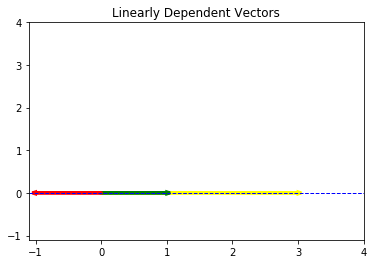

In [83]:
#how do you plot an R3 version of this?!

# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

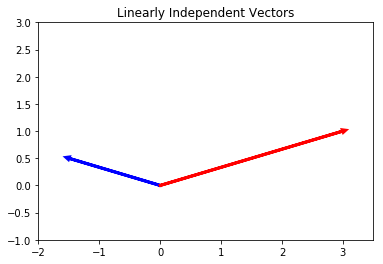

In [84]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#These are a single R because they scale

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#the span here is R^3 because neither vector is in the same dimension

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



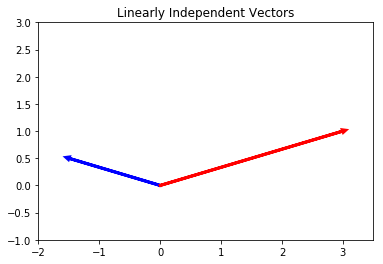

In [85]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

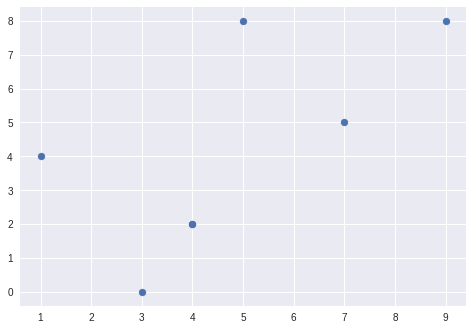

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()